1. Data Loading

In [163]:
# Libraries
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, label_binarize
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from torch.utils.data import Dataset, DataLoader, random_split

# Load Iris Dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Create a DataFrame
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target'] = y

# Display the first few rows of the DataFrame
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


2. Exploratory Data Analysis (EDA)

2.1 Check for Missing Values

In [164]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


2.2 Summary Statistics

In [165]:
# Summary statistics
print("Summary statistics of the dataset:")
print(df.describe())

Summary statistics of the dataset:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


2.3 Visualize Distributions of Features

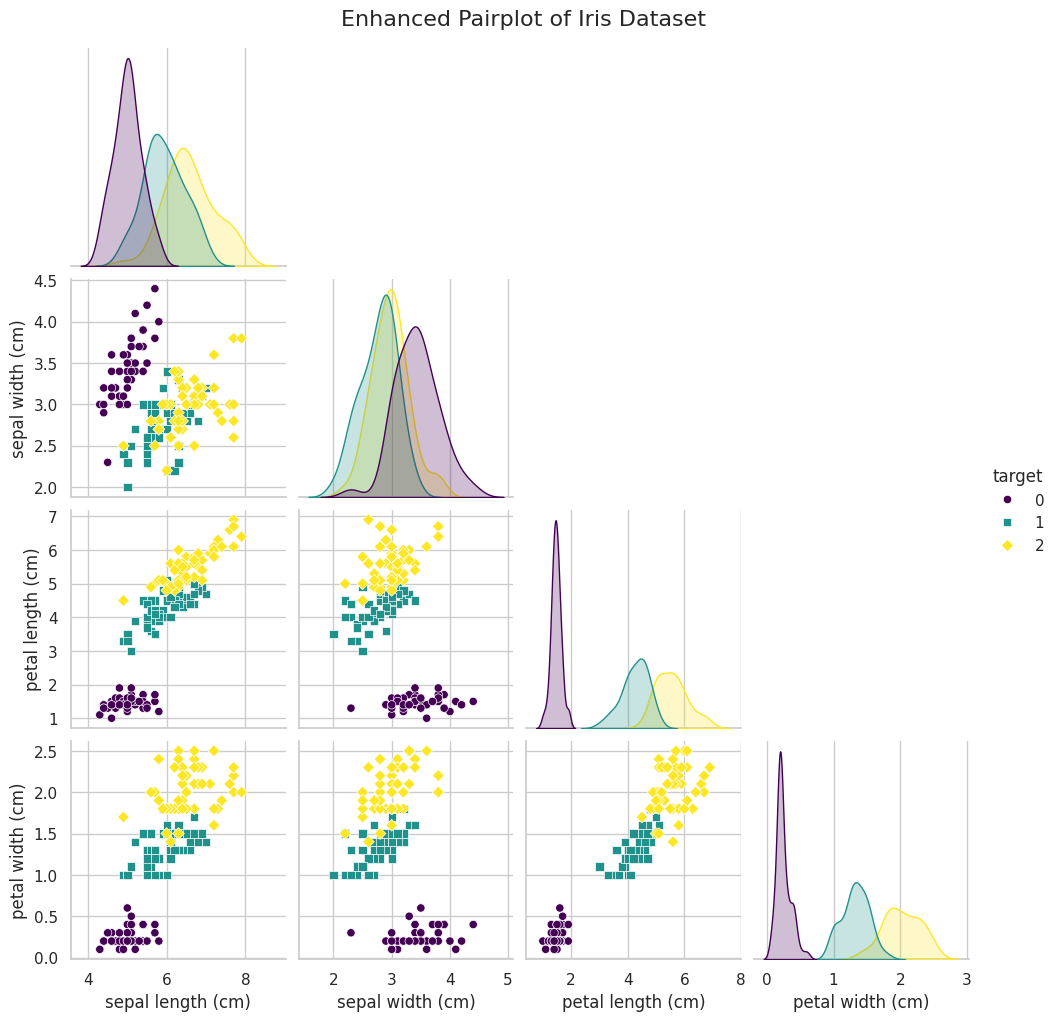

In [166]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'static' directory exists
os.makedirs('static', exist_ok=True)

# Set a more visually appealing style
sns.set_theme(style="whitegrid")

# Create the pairplot directly
sns.pairplot(df, hue='target', markers=['o', 's', 'D'], palette='viridis', corner=True)

# Add a title for the visualization
plt.suptitle('Enhanced Pairplot of Iris Dataset', fontsize=16, y=1.02)

# Save the figure with a higher DPI for better quality
plt.savefig('static/enhanced_pairplot.png', dpi=300, bbox_inches='tight')

# Show the figure
plt.show()

2.4 Visualize the Distribution of Target Classes

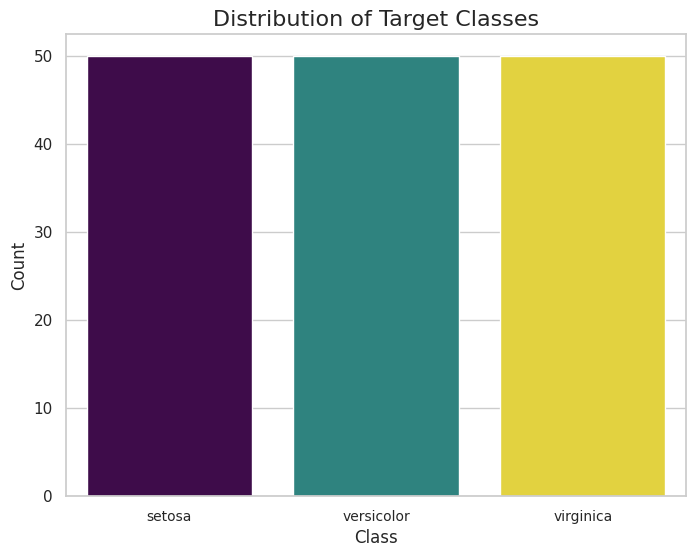

In [167]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'static' directory exists
os.makedirs('static', exist_ok=True)

# Set a visually appealing style
sns.set_theme(style="whitegrid")

# Create the count plot
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df, hue='target', palette='viridis', legend=False)

# Add title and labels
plt.title('Distribution of Target Classes', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Set x-ticks with proper class names
plt.xticks(ticks=[0, 1, 2], labels=iris.target_names, fontsize=10)

# Save the figure with a higher DPI for better quality
plt.savefig('static/class_distribution.png', dpi=300, bbox_inches='tight')

# Show the figure
plt.show()

2.5 Correlation Heatmap

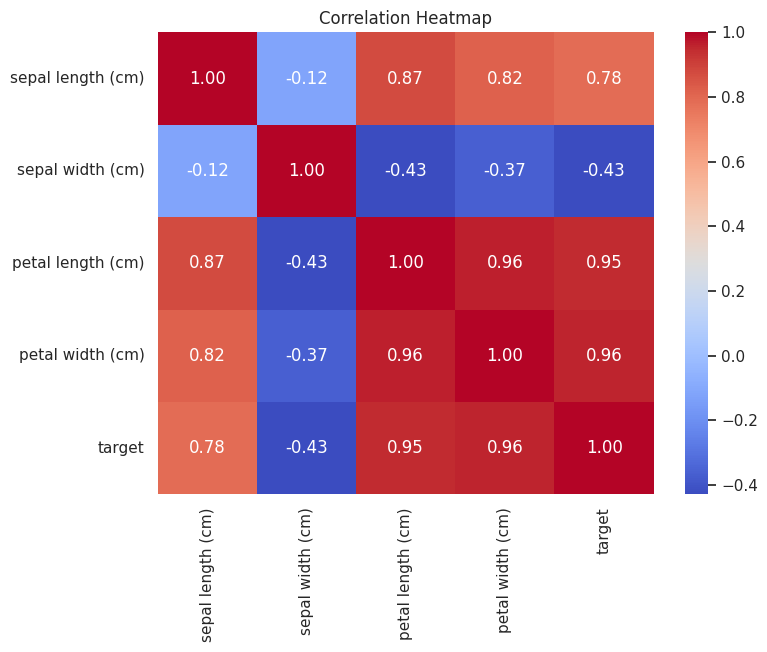

In [168]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('static/correlation_heatmap.png')
plt.show()

3. Data Preprocessing

3.1 Standardize the Features

In [169]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3.2 Generate Polynomial Features

In [170]:
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_scaled)

3.3 Convert to PyTorch Tensors

In [171]:
import torch

# Convert to PyTorch tensors
X_tensor = torch.FloatTensor(X_poly)
y_tensor = torch.LongTensor(y)

3.4 Create a Custom Dataset

In [172]:
from torch.utils.data import Dataset

# Custom Dataset
class IrisDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

3.5 Split into Training and Testing Datasets

In [173]:
from torch.utils.data import random_split

# Split into training and testing datasets
dataset = IrisDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoaders
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

4. Data Augmentation

4.1 Define Noise Injection Function

In [174]:
def add_noise(data, noise_level=0.05):
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

4.2 Augment the Data

In [175]:
# Create augmented data
X_augmented = add_noise(X_scaled, noise_level=0.05)
y_augmented = y

# Combine original and augmented data
X_combined = np.vstack((X_scaled, X_augmented))
y_combined = np.concatenate((y, y_augmented))

4.3 Convert Augmented Data to PyTorch Tensors

In [176]:
# Convert to PyTorch tensors
X_combined_tensor = torch.FloatTensor(X_combined)
y_combined_tensor = torch.LongTensor(y_combined)

# Create a new dataset with augmented data
augmented_dataset = IrisDataset(X_combined_tensor, y_combined_tensor)

4.4 Split Augmented Data into Training and Testing Datasets

In [177]:
# Split the augmented dataset
augmented_train_size = int(0.8 * len(augmented_dataset))
augmented_test_size = len(augmented_dataset) - augmented_train_size
augmented_train_dataset, augmented_test_dataset = random_split(
    augmented_dataset, [augmented_train_size, augmented_test_size])

# Create DataLoaders for augmented data
augmented_train_loader = DataLoader(augmented_train_dataset, batch_size=16, shuffle=True)
augmented_test_loader = DataLoader(augmented_test_dataset, batch_size=16, shuffle=False)

5. Model Definition

5.1 Define the Advanced MLP Model

In [178]:
import torch.nn as nn

# Model Definition
class AdvancedMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(AdvancedMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.4)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.fc3(x)
        return self.softmax(x)

# Initialize Model
# input_size = X_poly.shape[1]  # Use the size after polynomial feature generation - ORIGINAL LINE, COMMENTED OUT
input_size = X_combined.shape[1]
hidden_size = 32
output_size = len(set(y))
model = AdvancedMLP(input_size, hidden_size, output_size)

6. Model Training with Learning Rate Scheduling

6.1 Initialize the Model, Loss Function, and Optimizer

In [179]:
import torch.optim as optim

# Initialize the model
model = AdvancedMLP(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

6.2 Training Loop

In [180]:
# Training Loop with Early Stopping
num_epochs = 200
patience = 10
best_loss = float('inf')
trigger_times = 0

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for features, labels in augmented_train_loader:
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    epoch_loss /= len(augmented_train_loader)
    scheduler.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')

    # Early Stopping
    if epoch_loss < best_loss:
        best_loss = epoch_loss
        trigger_times = 0
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print("Early stopping triggered!")
            break

Epoch [1/200], Loss: 1.0822
Epoch [2/200], Loss: 0.9956
Epoch [3/200], Loss: 0.8810
Epoch [4/200], Loss: 0.8092
Epoch [5/200], Loss: 0.7541
Epoch [6/200], Loss: 0.6710
Epoch [7/200], Loss: 0.6410
Epoch [8/200], Loss: 0.6078
Epoch [9/200], Loss: 0.5879
Epoch [10/200], Loss: 0.5300
Epoch [11/200], Loss: 0.5314
Epoch [12/200], Loss: 0.5112
Epoch [13/200], Loss: 0.4755
Epoch [14/200], Loss: 0.4785
Epoch [15/200], Loss: 0.4558
Epoch [16/200], Loss: 0.4432
Epoch [17/200], Loss: 0.3899
Epoch [18/200], Loss: 0.4451
Epoch [19/200], Loss: 0.4262
Epoch [20/200], Loss: 0.3798
Epoch [21/200], Loss: 0.3567
Epoch [22/200], Loss: 0.4026
Epoch [23/200], Loss: 0.3900
Epoch [24/200], Loss: 0.4048
Epoch [25/200], Loss: 0.3866
Epoch [26/200], Loss: 0.3756
Epoch [27/200], Loss: 0.3516
Epoch [28/200], Loss: 0.3563
Epoch [29/200], Loss: 0.3783
Epoch [30/200], Loss: 0.3218
Epoch [31/200], Loss: 0.3149
Epoch [32/200], Loss: 0.3087
Epoch [33/200], Loss: 0.3398
Epoch [34/200], Loss: 0.3303
Epoch [35/200], Loss: 0

7. Model Evaluation and Saving

7.1 Evaluate the Model

In [181]:
# Evaluate the model
model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    for features, labels in augmented_test_loader:
        outputs = model(features)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

7.2 Calculate Accuracy and Additional Metrics

In [182]:
# Calculate accuracy and print classification report
accuracy = accuracy_score(all_labels, all_predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(all_labels, all_predictions, target_names=iris.target_names))

Accuracy: 98.33%
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        22
  versicolor       1.00      0.95      0.97        19
   virginica       0.95      1.00      0.97        19

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



7.3 Save the Model



In [183]:
import os

# Save the model
model_path = 'model/advanced_iris_model.pt'

# Create the 'model' directory if it doesn't exist
os.makedirs(os.path.dirname(model_path), exist_ok=True)

torch.save(model.state_dict(), model_path)

7.4 Generate Confusion Matrix

In [184]:
# Generate confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

8. Visualization of Results

8.1 Plot Confusion Matrix

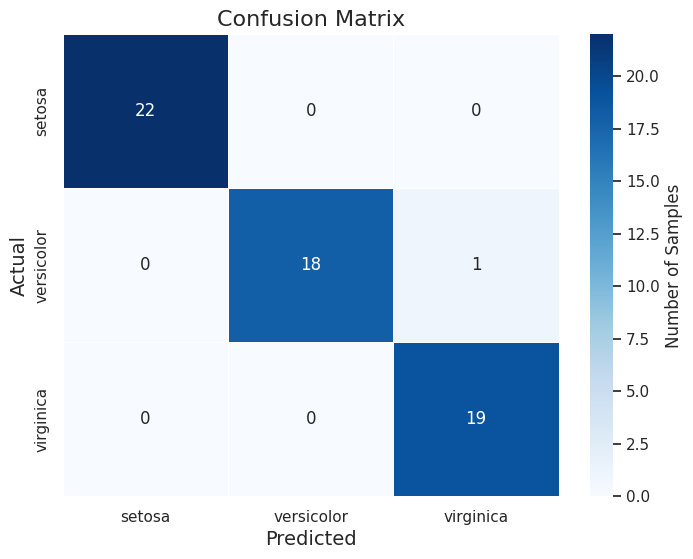

In [185]:
# Generate the confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names,
            cbar_kws={'label': 'Number of Samples'}, annot_kws={'size': 12}, linewidths=0.5)

# Add labels and title
plt.ylabel('Actual', fontsize=14)
plt.xlabel('Predicted', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)

# Show the plot
plt.show()

8.2 ROC Curve and AUC Calculation

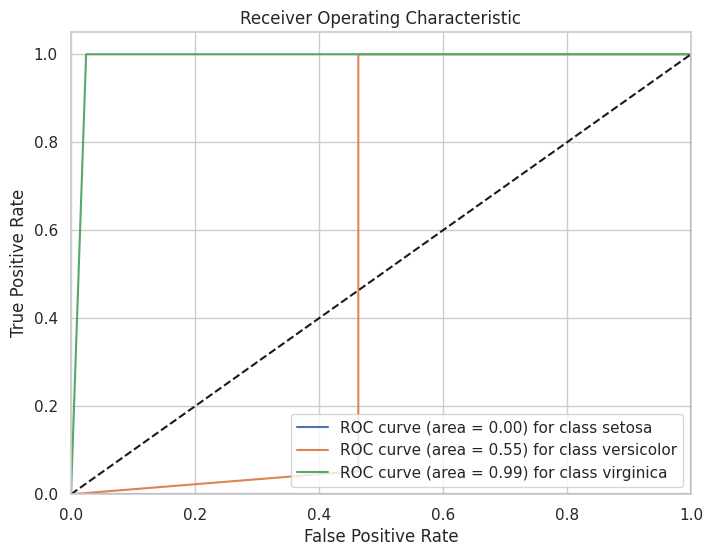

In [186]:
from sklearn.metrics import roc_curve, auc

# Binarize the output labels
from sklearn.preprocessing import label_binarize

y_binarized = label_binarize(all_labels, classes=[0, 1, 2])
n_classes = y_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], all_predictions)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {iris.target_names[i]}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.savefig('static/roc_curve.png')
plt.show()

9. Model Inference Pipeline

9.1 Define Inference Function

In [187]:
def infer(features):
    model.eval()
    with torch.no_grad():
        # Features are already preprocessed in the augmented dataset
        prediction = model(features.unsqueeze(0))
        predicted_class_idx = torch.argmax(prediction).item()
        predicted_class_name = class_names[predicted_class_idx]
    return predicted_class_name

9.2 Test the Inference

In [188]:
# Get a single batch from the augmented test loader
test_batch = next(iter(augmented_test_loader))

# Extract a single sample and its features
single_sample_features, single_sample_label = test_batch[0][0], test_batch[1][0]

# Test inference on this single sample
predicted_class = infer(single_sample_features)
actual_class = class_names[single_sample_label.item()]
print(f"Predicted class: {predicted_class}")
print(f"Actual class: {actual_class}")

Predicted class: versicolor
Actual class: versicolor


9.3 Batch Inference

In [189]:
def infer(features):
    model.eval()
    with torch.no_grad():
        # Check if features are 1D (single sample) or 2D (batch)
        if features.dim() == 1:
            features = features.unsqueeze(0)

        # Get prediction directly since features are already preprocessed
        prediction = model(features)
        predicted_class_idx = torch.argmax(prediction).item()
        predicted_class_name = class_names[predicted_class_idx]
    return predicted_class_name

# Batch inference function
def batch_infer(data_loader):
    model.eval()
    predictions = []
    actual_labels = []

    with torch.no_grad():
        for features, labels in data_loader:
            # Get predictions for the whole batch at once
            outputs = model(features)
            _, predicted = torch.max(outputs, 1)

            # Convert to class names
            batch_predictions = [class_names[idx] for idx in predicted.tolist()]
            batch_actual = [class_names[idx] for idx in labels.tolist()]

            predictions.extend(batch_predictions)
            actual_labels.extend(batch_actual)

    return predictions, actual_labels

# Get predictions for the entire augmented test set
predictions, actual_labels = batch_infer(augmented_test_loader)

# Print some example predictions
print("\nSample of predictions vs actual labels:")
for i in range(min(10, len(predictions))):  # Show first 10 predictions
    print(f"Predicted: {predictions[i]}, Actual: {actual_labels[i]}")

# Calculate accuracy
accuracy = sum(1 for p, a in zip(predictions, actual_labels) if p == a) / len(predictions)
print(f"\nOverall accuracy: {accuracy:.2%}")


Sample of predictions vs actual labels:
Predicted: versicolor, Actual: versicolor
Predicted: virginica, Actual: virginica
Predicted: virginica, Actual: virginica
Predicted: setosa, Actual: setosa
Predicted: setosa, Actual: setosa
Predicted: setosa, Actual: setosa
Predicted: virginica, Actual: virginica
Predicted: virginica, Actual: virginica
Predicted: versicolor, Actual: versicolor
Predicted: versicolor, Actual: versicolor

Overall accuracy: 98.33%
